In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
notif = pd.read_csv ("C:/Users/Aliki/Desktop/PF Project/data/notifications.csv")
notif.shape

(97704, 5)

In [5]:
notif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97704 entries, 0 to 97703
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reason        97704 non-null  object
 1   channel       97704 non-null  object
 2   status        97704 non-null  object
 3   user_id       97704 non-null  object
 4   created_date  97704 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [6]:
notif.head()

,reason,channel,status,user_id,created_date
0,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_1252,2018-12-02 17:58:33.320645
1,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_12783,2018-12-01 23:09:37.367127
2,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_10244,2018-12-04 02:57:56.425660
3,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_14486,2018-12-14 17:09:58.900808
4,REENGAGEMENT_ACTIVE_FUNDS,PUSH,SENT,user_28,2018-12-11 12:42:59.718574


 <li><b>reason</b> : σκοπός ειδοποίησης</li>
 
 <li><b>channel</b> : πώς ειδοποιήθηκε ο user (PUSH, SMS, EMAIL) </li>
 
 <li><b>status</b> : κατάσταση ειδοποίησης (SENT, FAILED)</li>
 
 <li><b>user_id</b> : ο user (15156) </li>
 
 <li><b>created_date</b> : πότε στάλθηκε η ειδοποίηση</li>

In [ ]:
# Finding the null values.
print(notif.isnull().sum())# there are no nulls

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

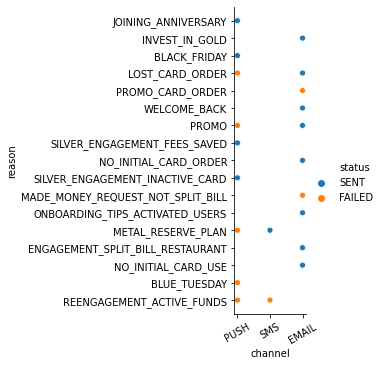

In [7]:
## Draw the status of notification ('sent:1', 'failed:0') 

sns.relplot(x="channel", y="reason", hue="status", data=notif)
#g.set_xticklabels(rotation=30)
plt.xticks(rotation=30)

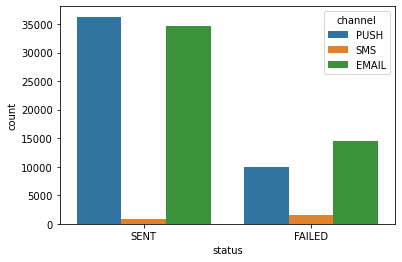

In [8]:
#Create a bar that counts for each channel if it is Sent or failed
sns.countplot('status',hue='channel',data=notif)

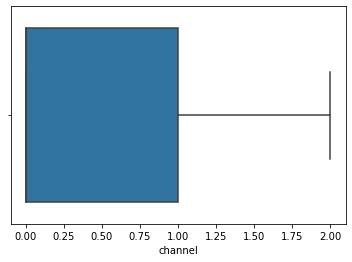

In [41]:
sns.boxplot(notif['channel'])

### Status

In [5]:
notif['status'].value_counts()

SENT      71693
FAILED    26011
Name: status, dtype: int64

In [6]:
notif['status'].replace({'FAILED':0,'SENT':1},inplace=True) 
notif['status'].value_counts()

1    71693
0    26011
Name: status, dtype: int64

### Channel

In [10]:
notif['channel'].value_counts()

EMAIL    49149
PUSH     46244
SMS       2311
Name: channel, dtype: int64

In [39]:
notif['channel'].replace({'EMAIL':0,'PUSH':1,'SMS':2},inplace=True) 
notif['channel'].value_counts()

0    49149
1    46244
2     2311
Name: channel, dtype: int64

### Reason

In [11]:
notif['reason'].value_counts()

REENGAGEMENT_ACTIVE_FUNDS            28832
PROMO                                18987
NO_INITIAL_CARD_ORDER                 9071
NO_INITIAL_CARD_USE                   9035
INVEST_IN_GOLD                        6649
LOST_CARD_ORDER                       4941
PROMO_CARD_ORDER                      4358
JOINING_ANNIVERSARY                   3334
MADE_MONEY_REQUEST_NOT_SPLIT_BILL     2851
ONBOARDING_TIPS_ACTIVATED_USERS       2423
ENGAGEMENT_SPLIT_BILL_RESTAURANT      1834
BLACK_FRIDAY                          1681
METAL_RESERVE_PLAN                     950
SILVER_ENGAGEMENT_INACTIVE_CARD        896
WELCOME_BACK                           779
BLUE_TUESDAY                           555
SILVER_ENGAGEMENT_FEES_SAVED           528
Name: reason, dtype: int64

In [43]:
#reason_dict = {'JOINING_ANNIVERSARY': 'General','WELCOME_BACK': 'General','ONBOARDING_TIPS_ACTIVATED_USERS': 'General',
#               'BLACK_FRIDAY': 'General','BLUE_TUESDAY': 'General',
#              'LOST_CARD_ORDER': 'Card Services','PROMO_CARD_ORDER': 'Card Services',
#               'NO_INITIAL_CARD_ORDER': 'Card Services','NO_INITIAL_CARD_USE': 'Card Services',
#              'REENGAGEMENT_ACTIVE_FUNDS': 'Proposals','INVEST_IN_GOLD': 'Proposals',
#               'METAL_RESERVE_PLAN': 'Proposals','PROMO': 'Proposals',
#              'MADE_MONEY_REQUEST_NOT_SPLIT_BILL': 'Movements', 'ENGAGEMENT_SPLIT_BILL_RESTAURANT': 'Movements',
#              'SILVER_ENGAGEMENT_INACTIVE_CARD': 'Silver', 'SILVER_ENGAGEMENT_FEES_SAVED': 'Silver'}

#notif['reason'] = notif['reason'].map(reason_dict)
#notif['reason'].value_counts()

Proposals        55418
Card Services    27405
General           8772
Movements         4685
Silver            1424
Name: reason, dtype: int64

In [14]:
df_not = notif[notif.reason == 'REENGAGEMENT_ACTIVE_FUNDS']
df_not.shape

(28832, 5)

In [11]:
pd.crosstab(index=notif['reason'],columns=notif['channel'])

channel,EMAIL,PUSH,SMS
reason,,,
BLACK_FRIDAY,0,1681,0
BLUE_TUESDAY,0,555,0
ENGAGEMENT_SPLIT_BILL_RESTAURANT,1834,0,0
INVEST_IN_GOLD,6649,0,0
JOINING_ANNIVERSARY,0,3334,0
LOST_CARD_ORDER,1888,3053,0
MADE_MONEY_REQUEST_NOT_SPLIT_BILL,2851,0,0
METAL_RESERVE_PLAN,0,346,604
NO_INITIAL_CARD_ORDER,9071,0,0


In [12]:
pd.crosstab(index=notif['reason'],columns=notif['status'])

status,FAILED,SENT
reason,,
BLACK_FRIDAY,253,1428
BLUE_TUESDAY,129,426
ENGAGEMENT_SPLIT_BILL_RESTAURANT,555,1279
INVEST_IN_GOLD,1192,5457
JOINING_ANNIVERSARY,601,2733
LOST_CARD_ORDER,1516,3425
MADE_MONEY_REQUEST_NOT_SPLIT_BILL,1527,1324
METAL_RESERVE_PLAN,409,541
NO_INITIAL_CARD_ORDER,2240,6831


In [ ]:
#notifications = cat_not.drop(cat_not.columns[[3,4]], axis=1)

In [ ]:
#remove underscore from REASON

def remove_underscore (text):
  text= text.replace('_', ' ')
  return text
notif.reason = notif.reason.apply(remove_underscore)



In [ ]:
sns.set(color_codes=True)

for col in notif:
    plt.figure(figsize=(10,4))
    sns.barplot(notif[col].value_counts().values, notif[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [ ]:
for col in notif:
    plt.figure(figsize=(10,4))
    #The value_counts() function is used to get a Series containing counts of unique values.
    sent_counts = notif.loc[notif.status.values == 'SENT', col].value_counts() 
    failed_counts = notif.loc[notif.status.values == 'FAILED', col].value_counts()
    
    all_counts = list(set(list(sent_counts.index) + list(failed_counts.index)))
    
    #poses fores emfanizetai to send failed
    freq_sent = (notif.status.values == 'SENT').sum()
    freq_failed = (notif.status.values == 'FAILED').sum()
    
    sent_counts = sent_counts.to_dict()
    failed_counts = failed_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [sent_counts.get(k, 0) / freq_sent - failed_counts.get(k, 0) / freq_failed for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()
    

**Unique values Reason**

(general)
JOINING ANNIVERSARY,
WELCOME_BACK,
ONBOARDING TIPS ACTIVATED USERS,
BLACK FRIDAY,
BLUE TUESDAY

(Card services)
LOST CARD ORDER ,                      
PROMO CARD ORDER,                      
NO INITIAL CARD ORDER,            
NO INITIAL CARD USE

(proposal)                  
REENGAGEMENT ACTIVE FUNDS,
INVEST IN GOLD,
METAL RESERVE PLAN,
PROMO

(movements)
MADE MONEY REQUEST NOT SPLIT BILL,     
ENGAGEMENT SPLIT BILL RESTAURANT      
                            
(silver)
SILVER ENGAGEMENT INACTIVE CARD,        
SILVER ENGAGEMENT FEES SAVED
